# Libraries Imported

1. **TensorFlow (tf)**: Deep learning framework for building and training models.
2. **Matplotlib (plt)**: Python plotting library for visualizations.
3. **NumPy (np)**: Library for numerical computations with arrays.
4. **Pandas (pd)**: Data manipulation and analysis tool.
5. **Os**: Operating system module for file and directory operations.
6. **Pickle**: Serialization module for saving Python objects.

These libraries enable various tasks such as plotting model performance and analyzing results in this notebook.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle

2024-06-05 23:23:00.855879: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-05 23:23:00.888150: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64
2024-06-05 23:23:00.888182: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.9.0'

## Loading Time Variables

1. **Function (`load_variables`)**:
   - Loads variables from pickle files (`time_var/{filename}`).
   - Parameters: `filename`, `vars2`.

2. **Usage**:
   - `load_variables(timeName, time_vars)`.
   - Populates `time_vars` with loaded variables.


In [3]:
timeName=[f for f in os.listdir("time_var/")]
timeName

['dcnn-v100', 'dcnn-rtx3050', 'dcnn-t4', 'dcnn-A100']

In [4]:
time_vars = []
def load_variables(filename=[],vars2=[]):
    for i in range(len(filename)):
        with open(f'time_var/{filename[i]}', 'rb') as file:
            vars2.append(pickle.load(file))
load_variables(timeName,time_vars)

In [5]:
time_vars

[325.60185384750366, 193.44189620018005, 314.5571882724762, 209.22806525230408]

In [6]:
timeName=[" ".join(f.split("-")).capitalize() for f in timeName]
timeName

['Dcnn v100', 'Dcnn rtx3050', 'Dcnn t4', 'Dcnn a100']

## GPU Comparison Bar Plot

1. **Figure Setup**:
   - Adjusts figure dimensions and resolution.

2. **Plotting**:
   - Creates a bar plot comparing training times across different GPUs.

3. **Labels and Formatting**:
   - Sets axis labels and adjusts font sizes.
   - Rotates x-axis labels for better readability.

4. **Saving and Displaying**:
   - Saves the plot as `GPU_Comparision.png`.
   - Displays the plot.

In [7]:
min_pixels = 900
max_pixels = 3000
dpi = 700
width_in_inches = max(min_pixels / dpi, 3)
height_in_inches = max(min_pixels / dpi, 3)
width_in_inches = min(width_in_inches, max_pixels / dpi)
height_in_inches = min(height_in_inches, max_pixels / dpi)

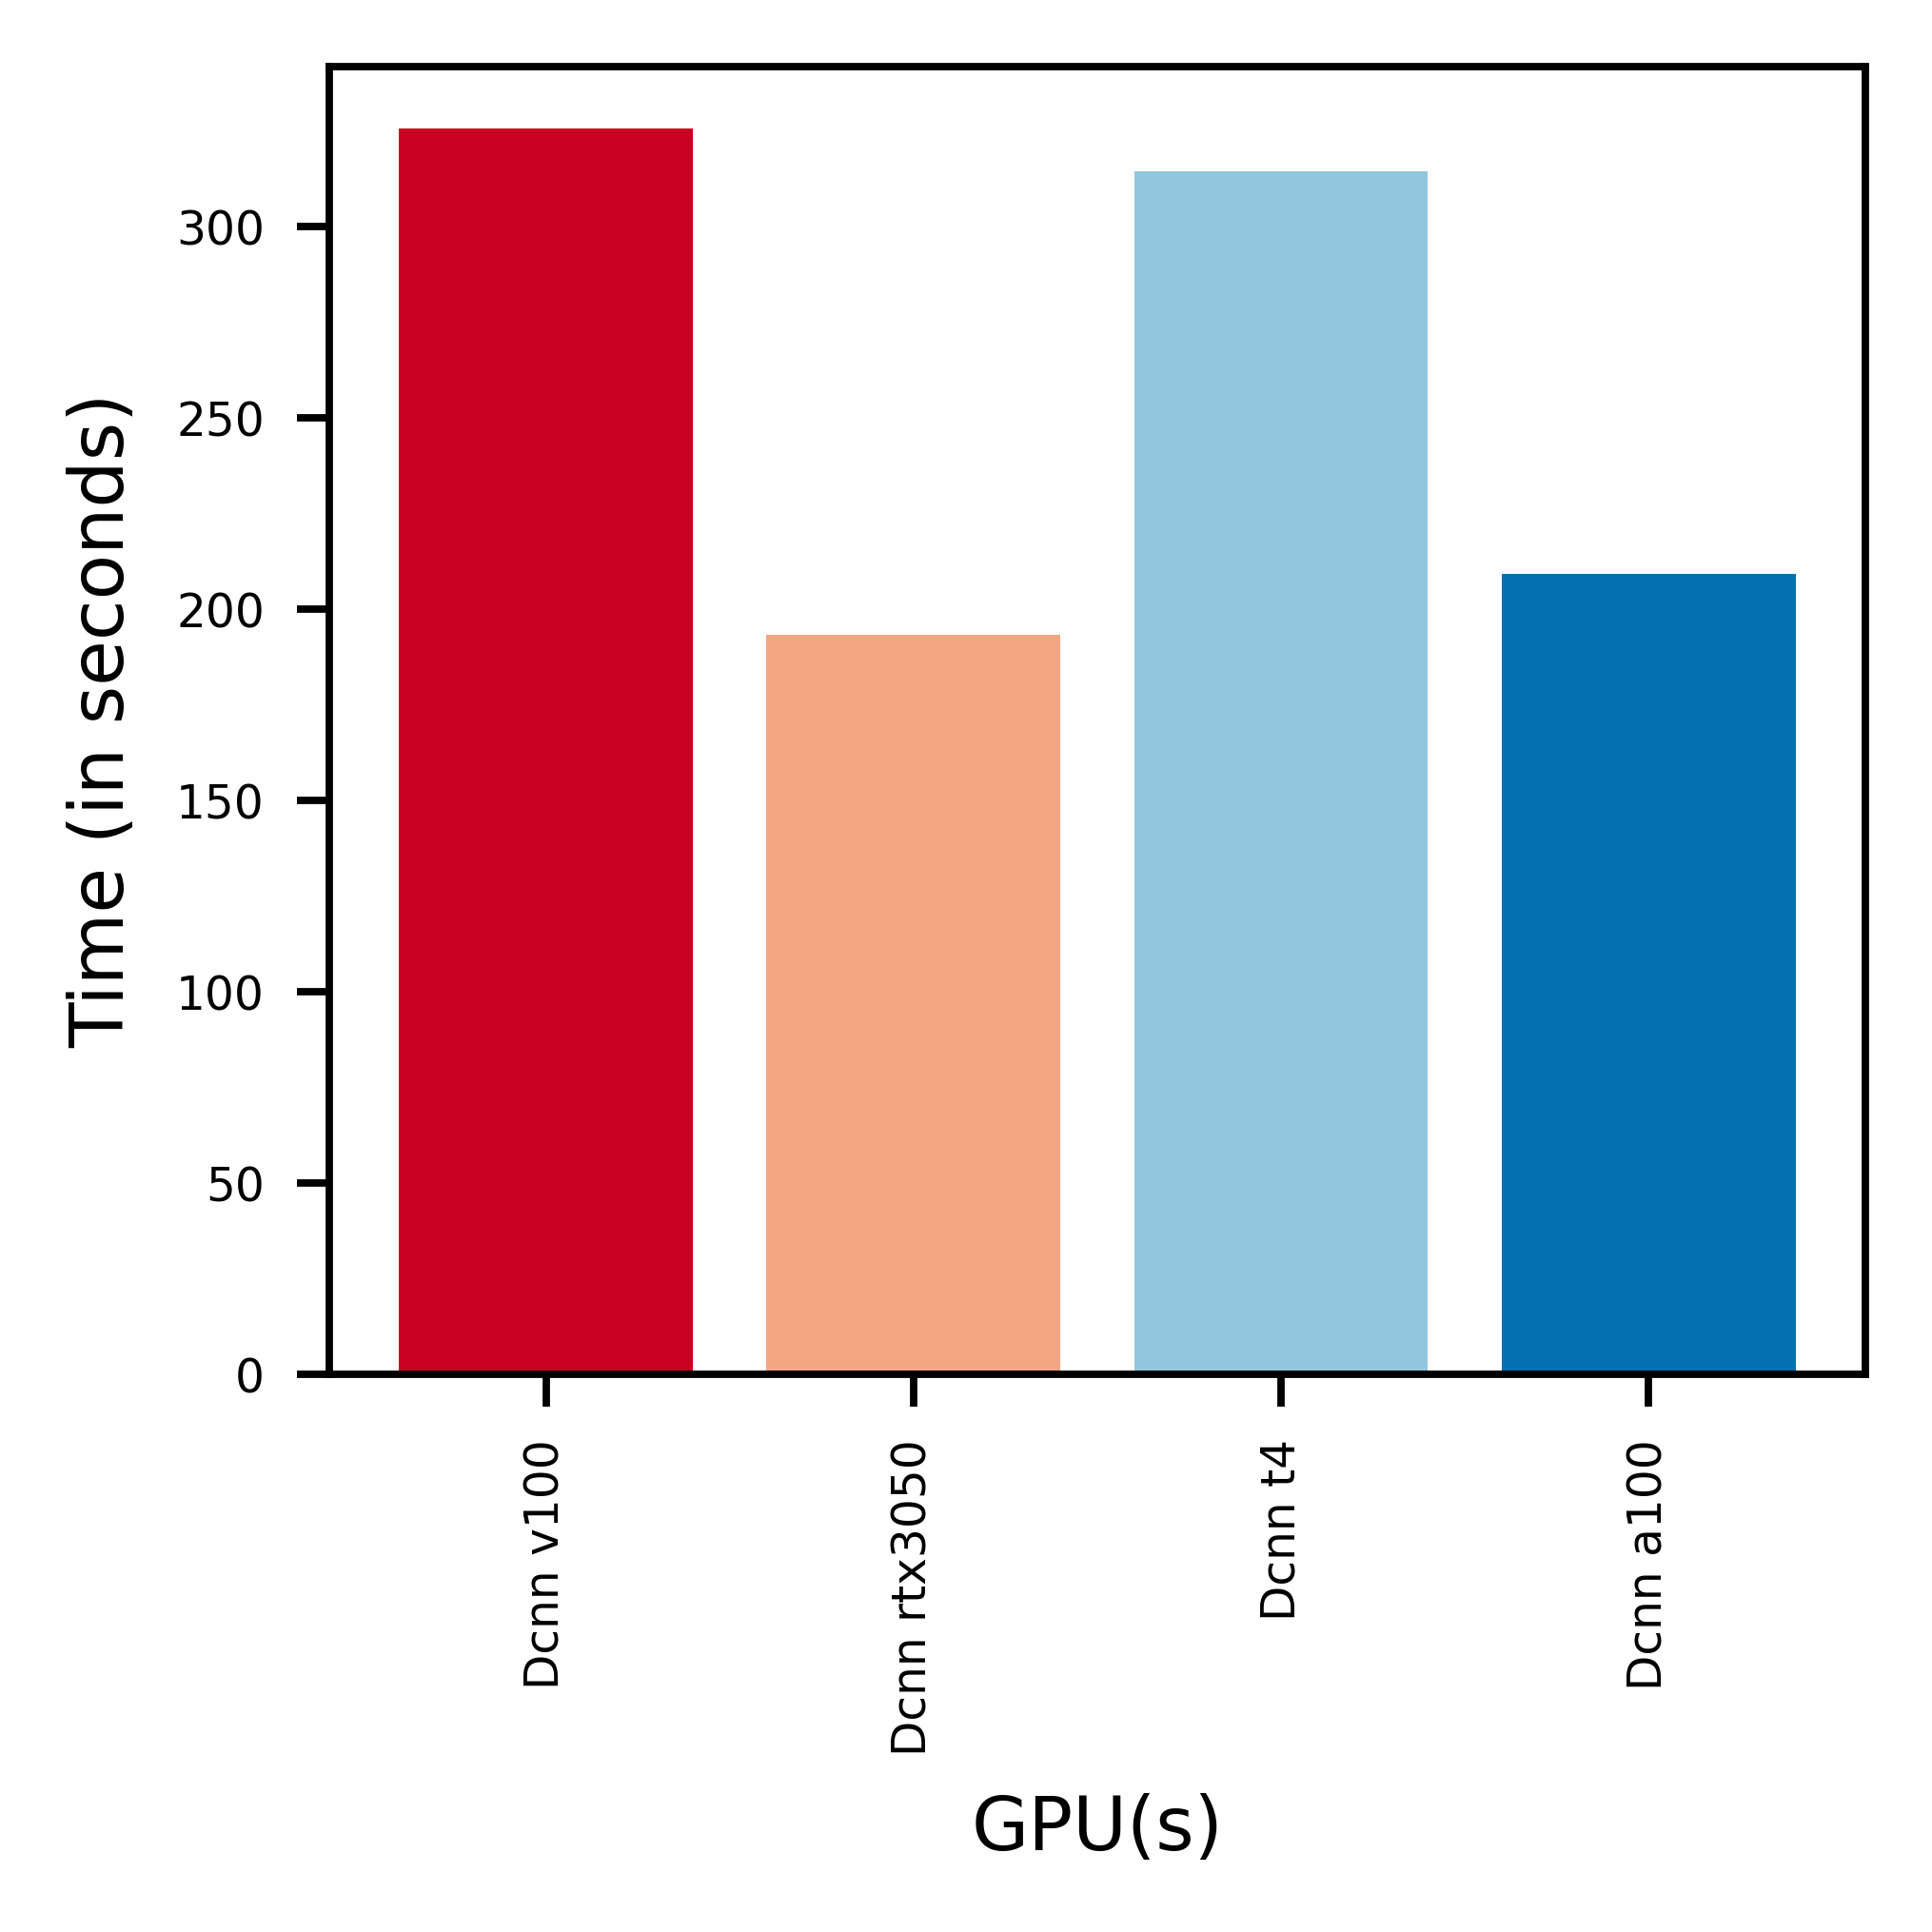

In [8]:
fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dpi)
colors = ['#ca0020','#f4a582','#92c5de','#0571b0']
plt.bar(timeName, height=time_vars, color=colors)
# plt.title("Training time vs GPU(s)")
plt.ylabel("Time (in seconds)", fontsize=8)
plt.xlabel("GPU(s)", fontsize=8)
plt.xticks(rotation=90,fontsize=5)
plt.yticks(fontsize=5)
plt.tight_layout()
plt.savefig("plot_model/GPU_Comparision.png", dpi = dpi, bbox_inches='tight')
plt.show()

In [9]:
filename3 = ["history-A100","history-t4","history-v100","hist_dcnn.pkl"]

## Function: `json_load`

### Description:
Loads JSON dictionaries from specified files into Python variables.

### Arguments:
- `filepath`: Path to the folder containing JSON files.
- `filenames`: List of filenames (including extensions) to load.

### Returns:
- List of Python dictionaries loaded from the JSON files.

In [12]:
def json_load(filepath : str ="", filenames : list = []) -> list:
    """
    Loads json dictionaries into python variables

    Args:
    filepath (str): Path to the folder enclosing the filenames. If not provided, will look for filenames in the working directory.
    filename (list(str)): Path to the file containing data. If not provided, will look for a .jsonl or .json files in

    Returns:
    List containing python dictionaries
    """
    import json
    var = []
    for i in range(len(filenames)):
        with open(f"{filepath}/{filenames[i]}") as file:
            var.append(json.load(file))
    return var

In [13]:
vars1 = os.listdir("hist_dict")
vars1

['history_dcnn_t4.json',
 'historyeffnetb4.json',
 'historyresnet.json',
 'history_dcnn_A100.json',
 'historyvgg16.json',
 'history_dcnn_V100.json',
 'history_dcnn_rtx3050.json',
 'historyvgg19.json']

### Function `plot_hist1`

This function plots Accuracy, Loss, Validation Accuracy, and Validation Loss metrics for multiple models in a 2x2 grid of subplots. It uses different colors and line styles for each model and annotates each subplot with corresponding labels.

In [14]:
def plot_hist1(hist:list =[], gpu_names:list =[],savefig = False, save="temp"):
    """
    Plots the Accuracy, Loss Val_Accuracy and Val_Loss of the given models in a subplot grid
    """
    if (len(hist) != len(gpu_names)):
        raise ValueError("Wrong Input size")   
    import matplotlib.pyplot as plt
    val_acc=[]
    val_loss=[]
    loss=[]
    accuracy=[]
    metrics=[val_acc,accuracy,val_loss,loss]
    metrics_title=["val_acc","accuracy","val_loss","loss"]
    titles = ["A","B","C","D"]
    for history in hist:
        accuracy.append(history["accuracy"][:20])
        val_acc.append(history["val_accuracy"][:20])
        loss.append(history["loss"][:20])
        val_loss.append(history["val_loss"][:20])
    fig, axs = plt.subplots(2, 2, figsize=(16, 16))
    # c=['g','r','b','orange',"black"]
    c = ['#ca0020','#f4a582','#f7f7f7','#92c5de','#0571b0']
    line_styles = ['-', '--', '-.', ':']
    min_pixels = 900
    max_pixels = 3000
    dpi = 450
    width_in_inches = max(min_pixels / dpi, 3)
    height_in_inches = max(min_pixels / dpi, 3)
    width_in_inches = min(width_in_inches, max_pixels / dpi)
    height_in_inches = min(height_in_inches, max_pixels / dpi)
    
    fig, axs = plt.subplot_mosaic([['a)', 'b)'], ['c)', 'd)']], layout='constrained')
    for j in range(len(metrics)):
        for i, (label, ax) in enumerate(axs.items()):
            if label[0] == chr(97 + j):
                for k, history in enumerate(hist):
                    ax.plot(metrics[j][k], c=c[k], linestyle=line_styles[k % len(line_styles)])
                ax.set_xlabel("epochs", fontsize=10)
                ax.set_ylabel(f"{metrics_title[j]}", fontsize=10)
                ax.annotate(label, xy=(0, 1), xycoords='axes fraction',
                            xytext=(+0.05, -0.05), textcoords='offset points',
                            fontsize=10, ha='left', va='top')
                ax.xaxis.set_major_locator(plt.MaxNLocator(12))
                ax.yaxis.set_major_locator(plt.MaxNLocator(12))
                ax.tick_params(axis='both', which='major', labelsize=8)
                ax.legend(fontsize=8)

    plt.tight_layout()
    # plt.savefig(f"plot_model/{save}.png", dpi=dpi, bbox_inches='tight')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/tmp/ipykernel_315510/3126791752.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


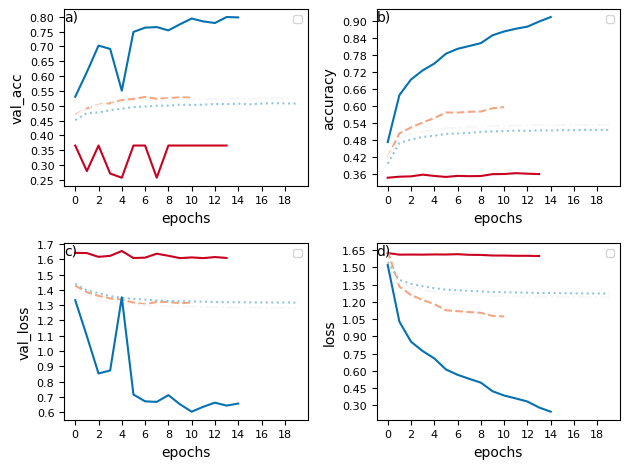

In [15]:
modelsName = [f for f in os.listdir("hist_dict/") if not f.startswith("history_")]
modelsName.append("history_dcnn_rtx3050.json")
vars_model = json_load(filepath="hist_dict",
                       filenames=modelsName)
vars_model_names = ["Efficient-NetB4","ResNet50V2","VGG-16","VGG19", "Proposed DCNN"]
plot_hist1(hist=vars_model,
          gpu_names = vars_model_names,
          save='full')

### Function `plot_hist2`

This function plots Accuracy, Loss, Validation Accuracy, and Validation Loss metrics for multiple models in separate figures. Each metric is plotted against epochs, using different colors for each model. It ensures that the plots are well-sized and labeled with appropriate titles and axis labels.

In [19]:
def plot_hist2(hist:list =[], gpu_names:list =[],savefig = False, save="temp"):
    """
    Plots the Accuracy, Loss Val_Accuracy and Val_Loss of the given models in a subplot grid
    """
    if (len(hist) != len(gpu_names)):
        raise ValueError("Wrong Input size")   
    import matplotlib.pyplot as plt
    val_acc=[]
    val_loss=[]
    loss=[]
    accuracy=[]
    metrics=[val_acc,accuracy,val_loss,loss]
    metrics_title=["val_acc","accuracy","val_loss","loss"]
    for history in hist:
        accuracy.append(history["accuracy"][:20])
        val_acc.append(history["val_accuracy"][:20])
        loss.append(history["loss"][:20])
        val_loss.append(history["val_loss"][:20])

    # plt.figure(figsize=(16,16))
    # c=['g','r','b','orange',"black"]
    c = ['#ca0020','#f4a582','#92c5de','#0571b0']
    line_styles = ['-', '--', '-.', ':']
    min_pixels = 900
    max_pixels = 3000
    dpi = 1000
    width_in_inches = max(min_pixels / dpi, 3)
    height_in_inches = max(min_pixels / dpi, 3)
    width_in_inches = min(width_in_inches, max_pixels / dpi)
    height_in_inches = min(height_in_inches, max_pixels / dpi)
    
    for j in range(len(metrics)):
        # plt.subplot(2,2,j+1)
        plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dpi)
        for i in range(len(hist)):
            plt.plot(metrics[j][i],c=c[i],label=gpu_names[i])
        plt.title(f"epochs vs {metrics_title[j]}")
        plt.xlabel("epochs", fontsize=7)
        plt.ylabel(metrics_title[j], fontsize=7)
        plt.legend()
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        # plt.savefig(f"plot_model/{metrics_title[j]}.png", dpi=dpi, bbox_inches='tight')
        plt.show()

In [20]:
[f for f in os.listdir("hist_dict/") if f.startswith("history_")]

['history_dcnn_t4.json',
 'history_dcnn_A100.json',
 'history_dcnn_V100.json',
 'history_dcnn_rtx3050.json']

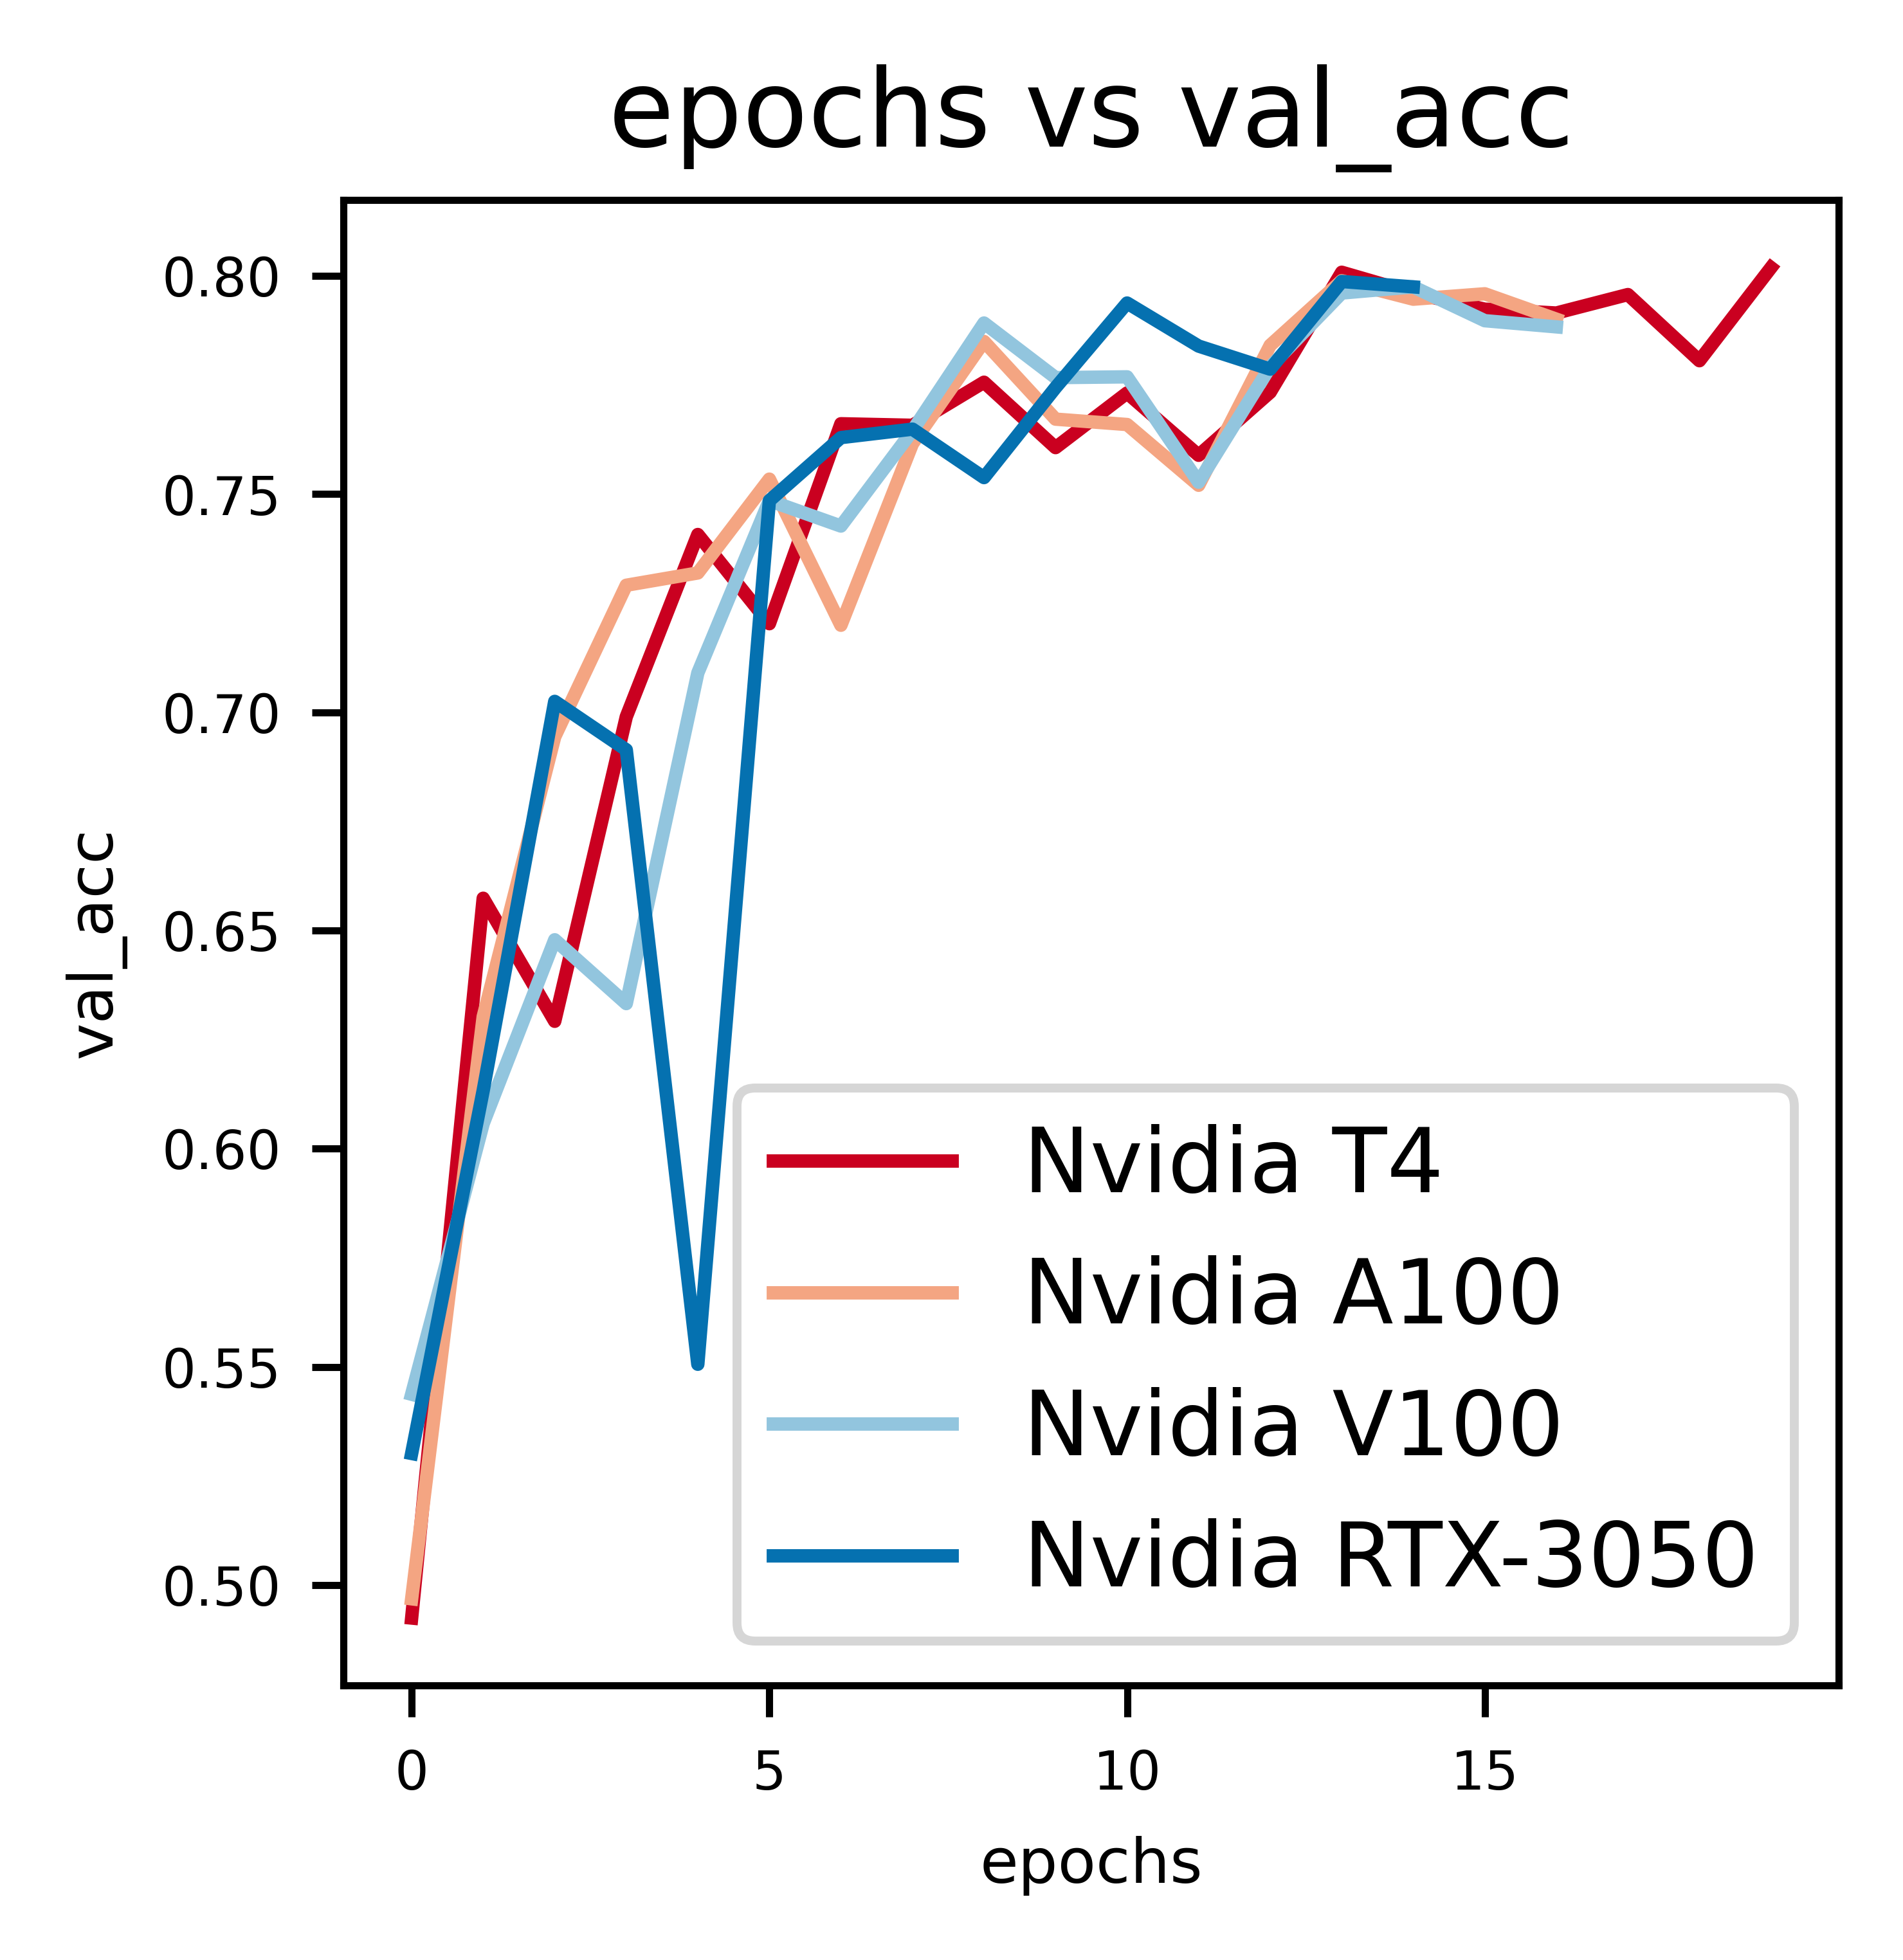

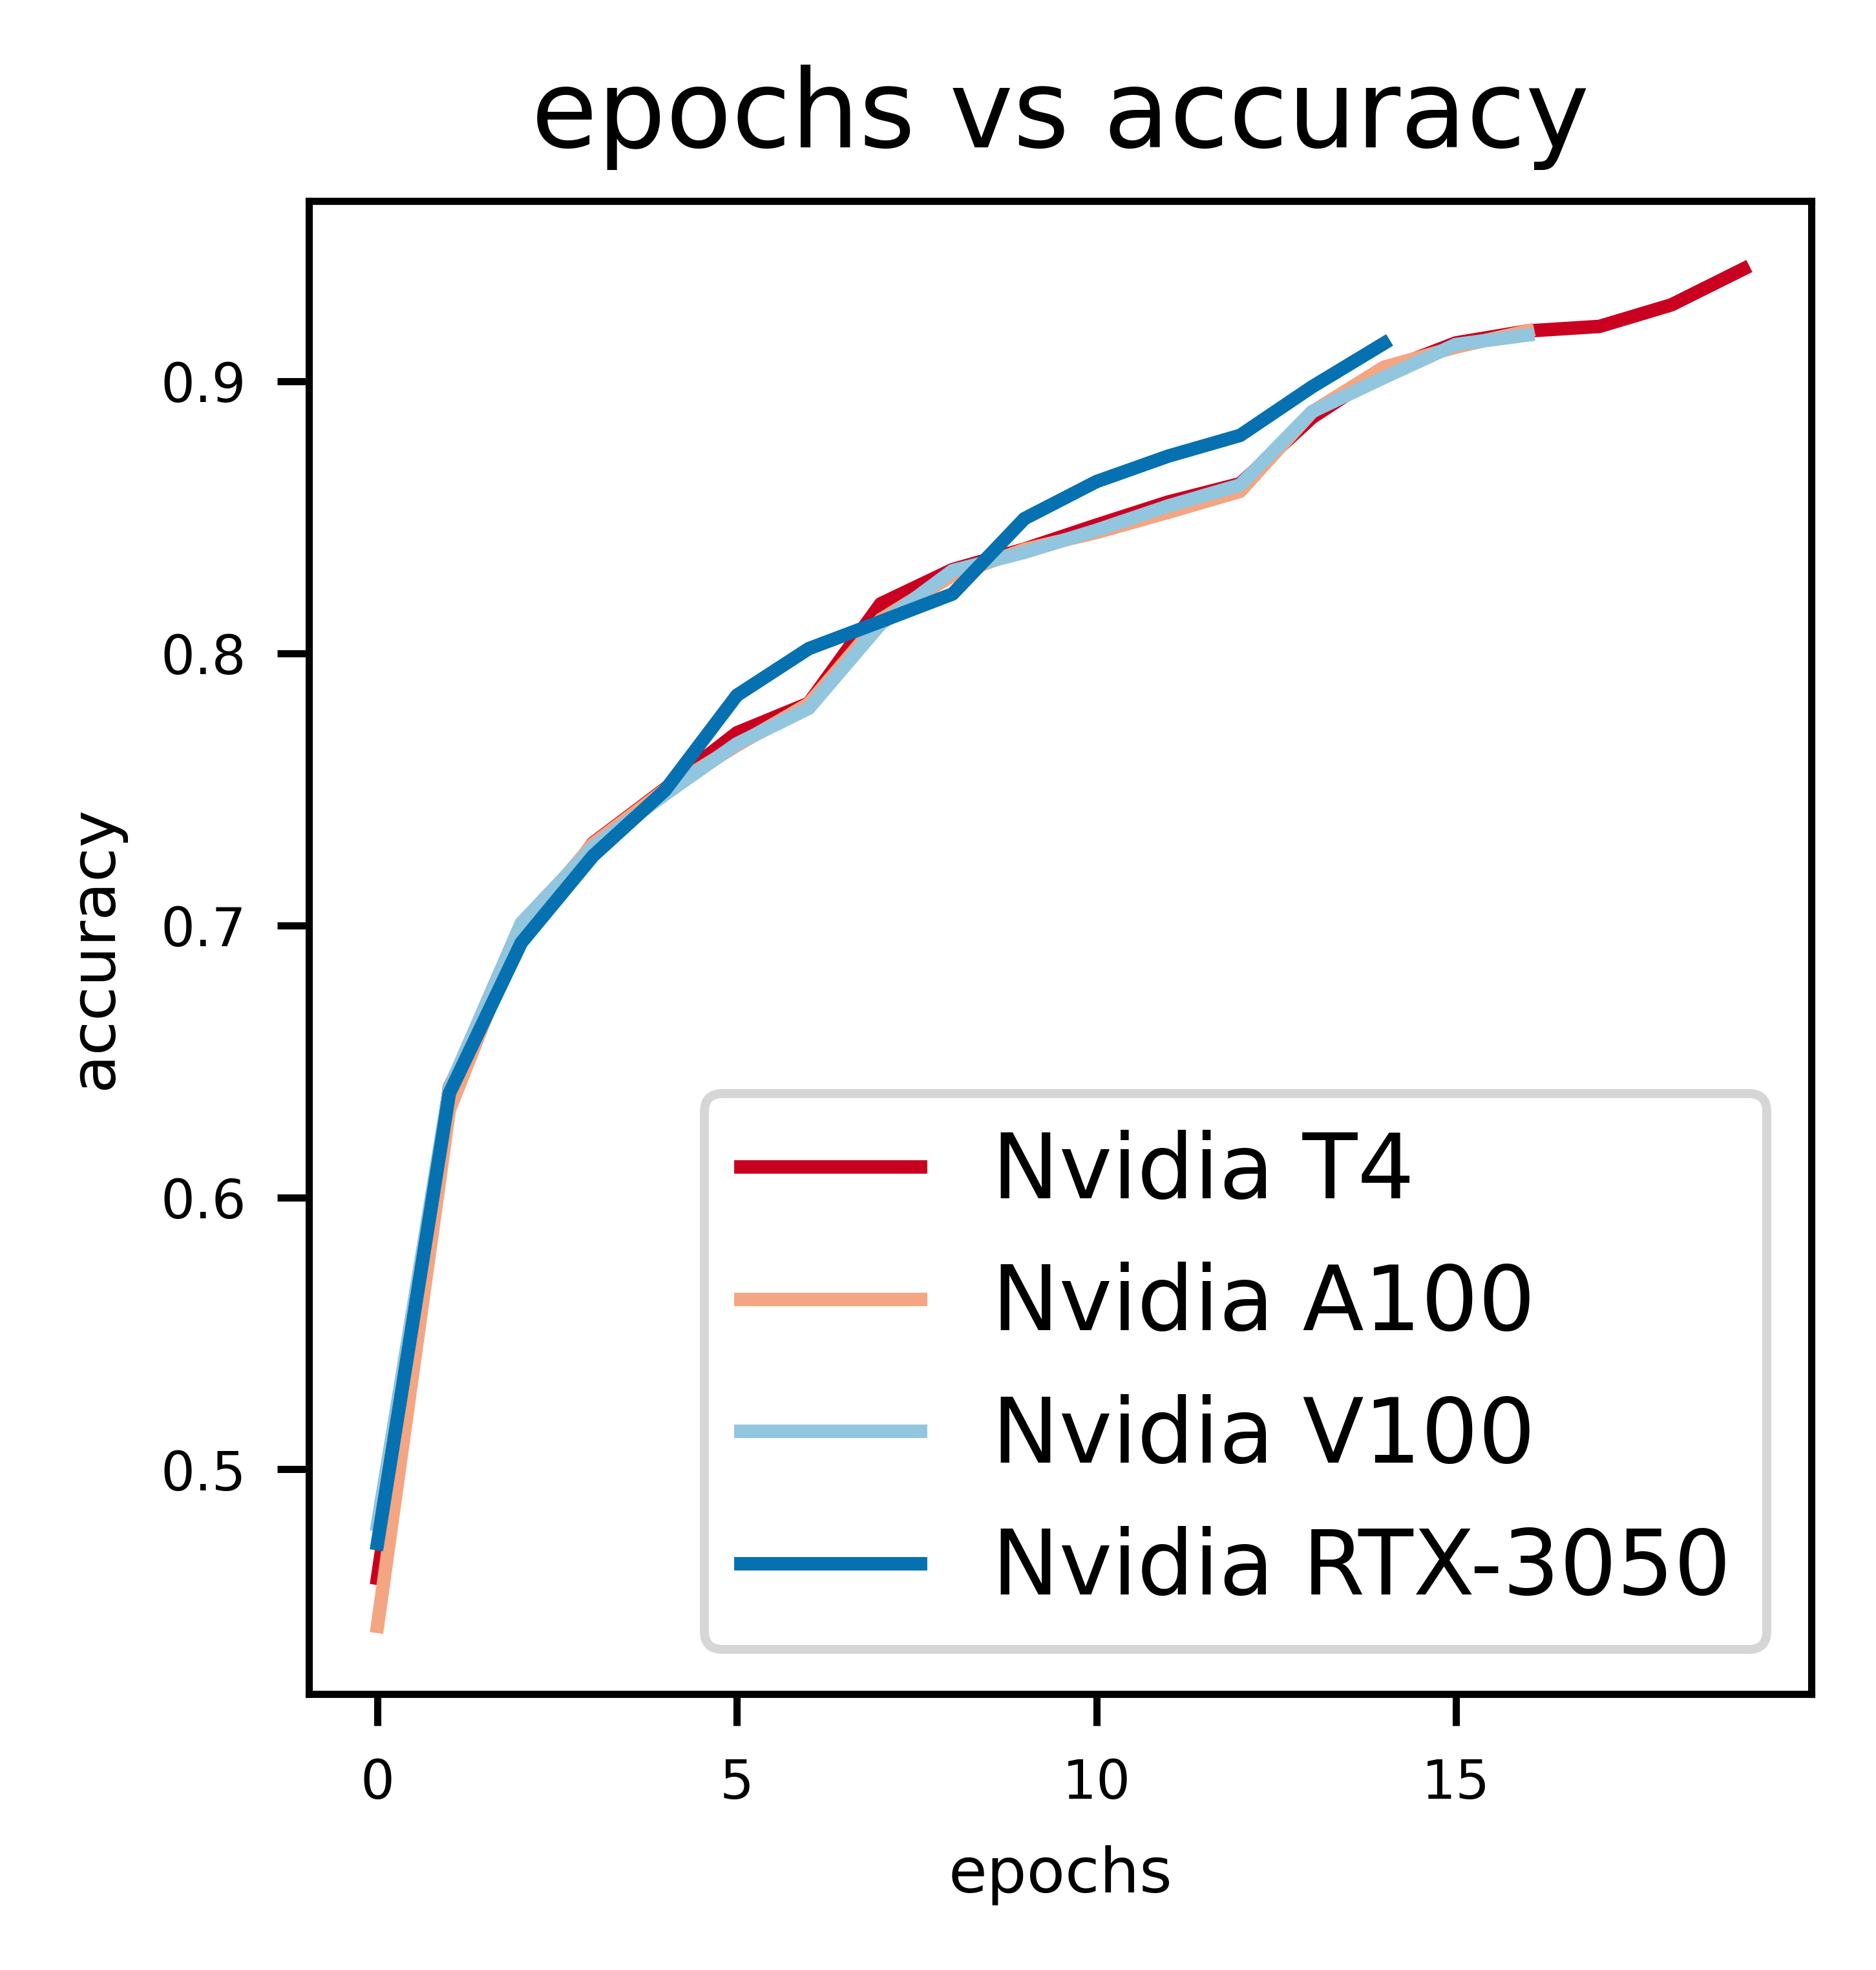

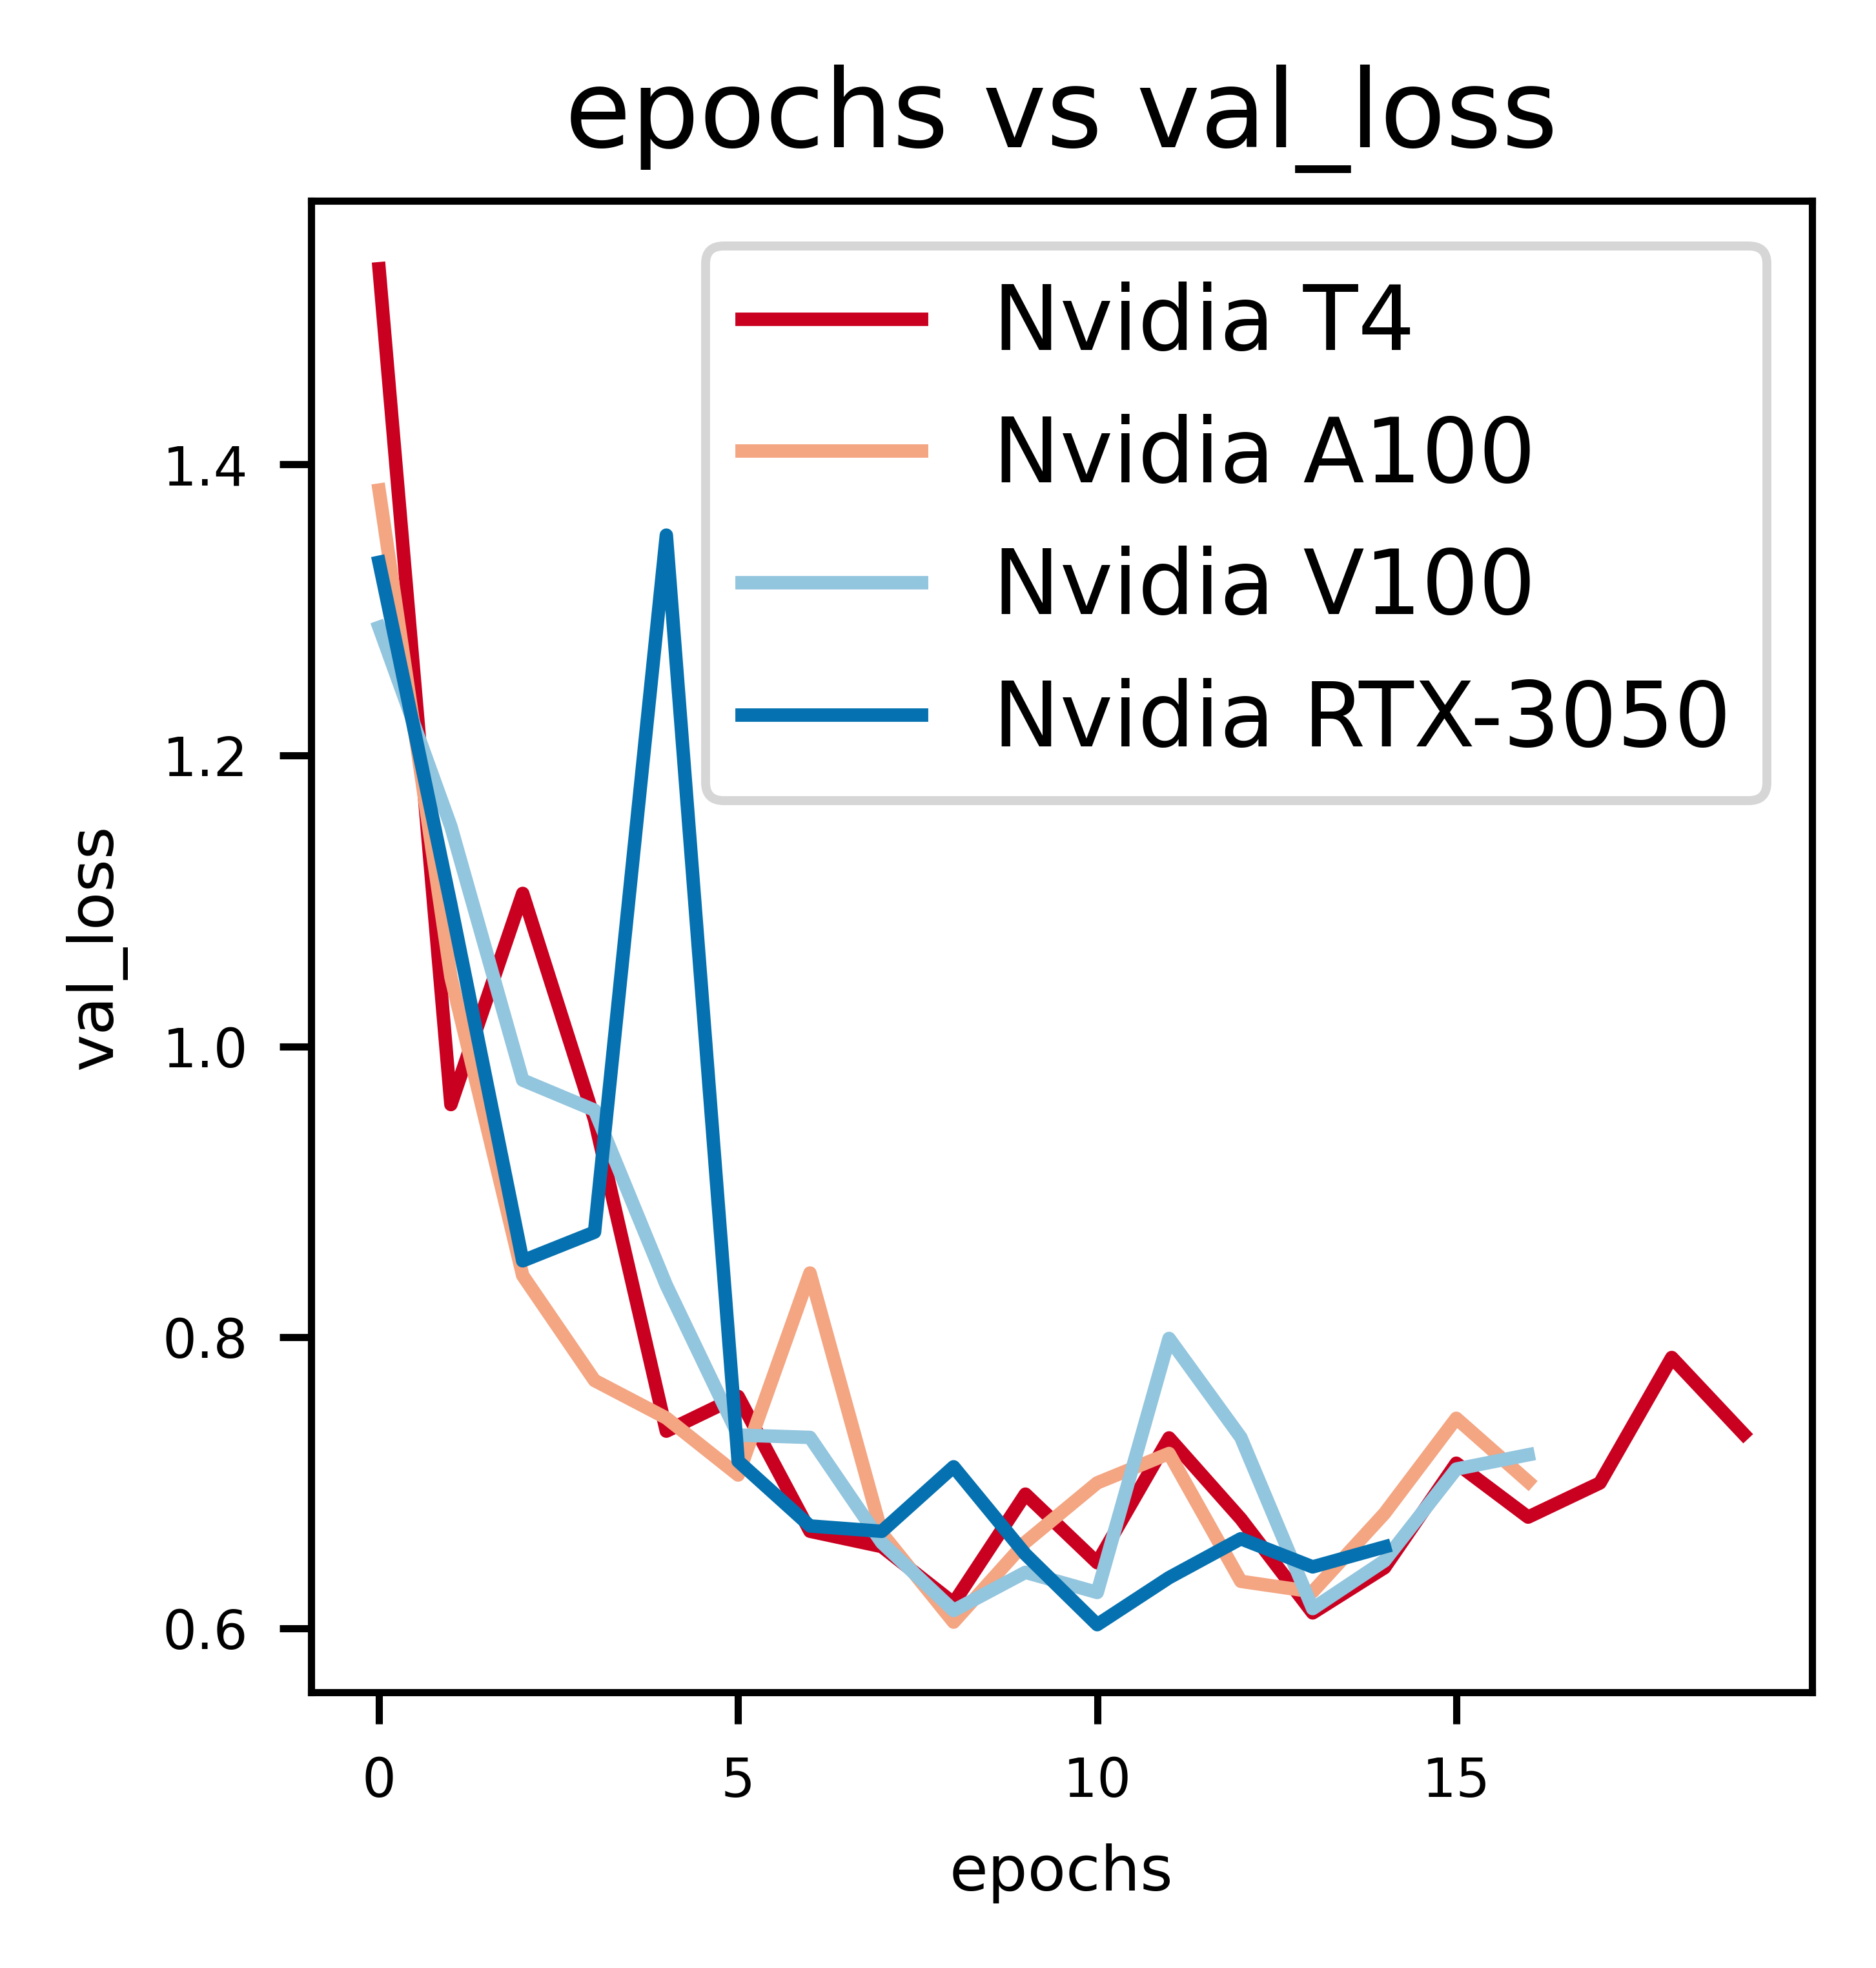

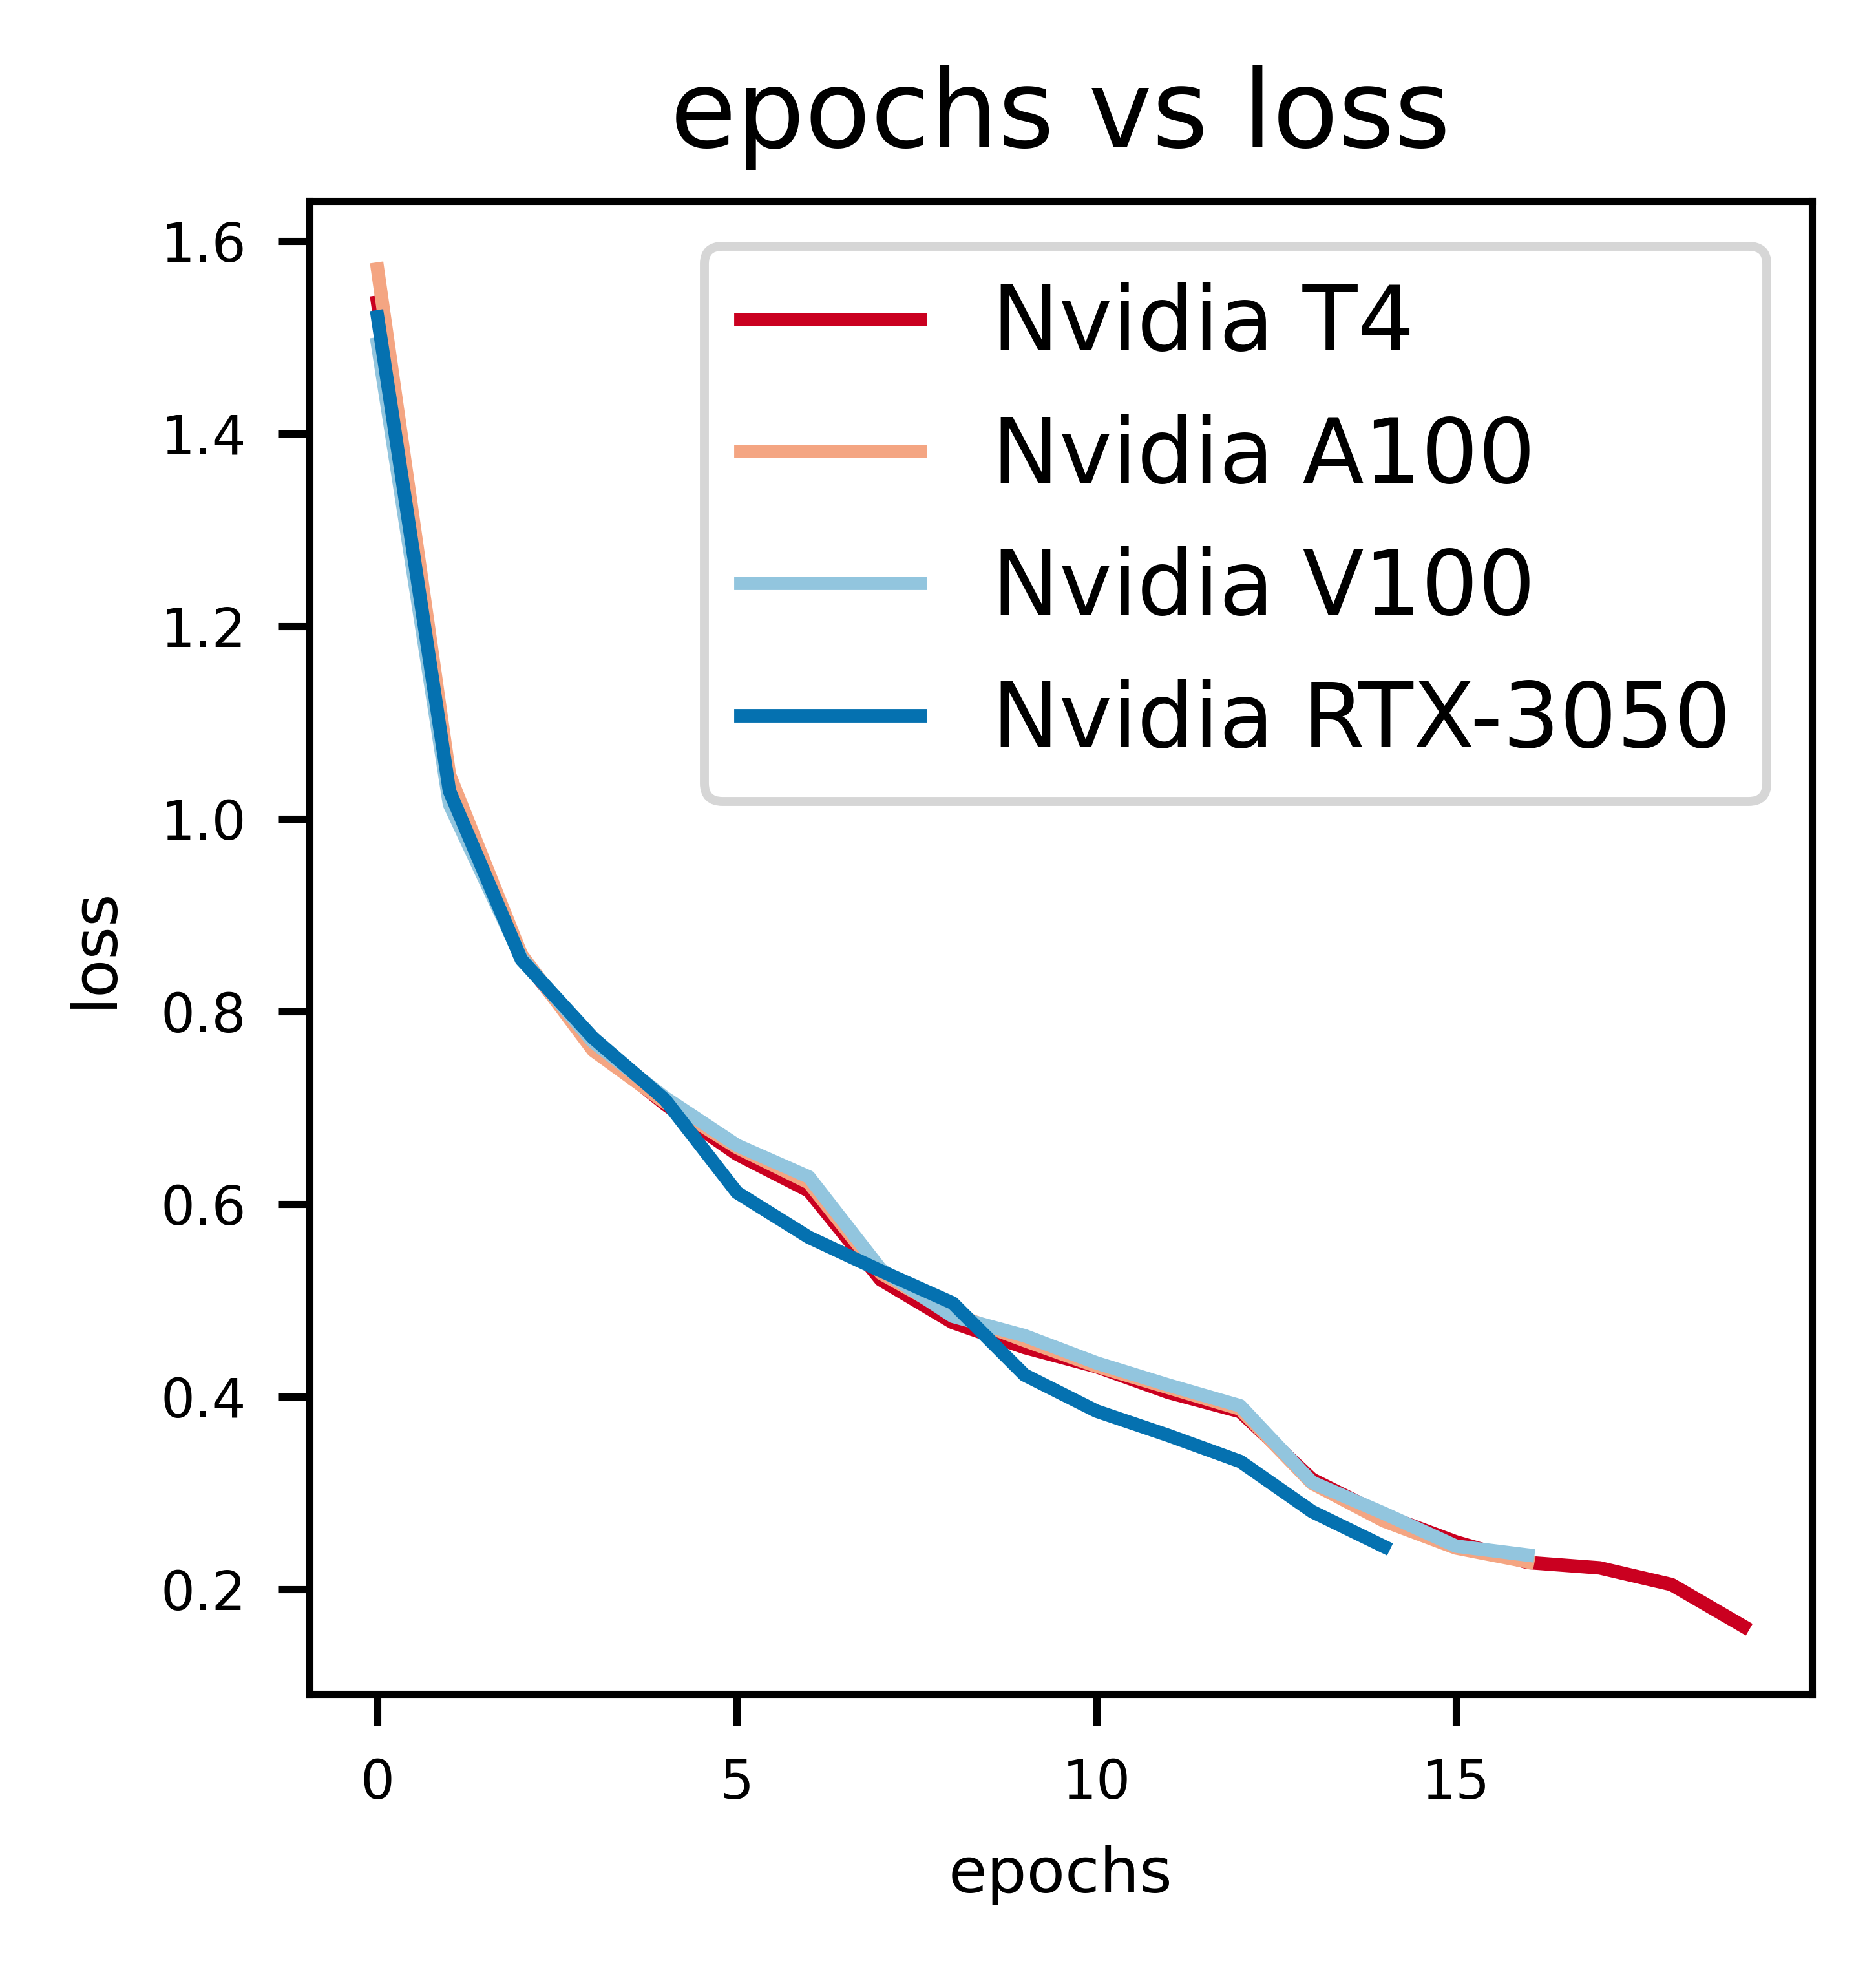

In [21]:
historyName = [f for f in os.listdir("hist_dict/") if f.startswith("history_")]
history_var = json_load(filepath="hist_dict",
          filenames=historyName)

plot_hist2(hist = history_var,
            gpu_names = ["Nvidia T4","Nvidia A100","Nvidia V100","Nvidia RTX-3050"],
            savefig=True)

### Plot Learning Rate Schedule

Here we generate a plot showing the learning rate schedule across epochs. The learning rates are plotted against epochs with a specific figure size and DPI to ensure clarity. Axes are labeled appropriately with font sizes adjusted for readability.


In [19]:
lr_var = os.listdir(path="hist_dict")[-2]
lr_var

'history_dcnn_rtx3050.json'

In [20]:
lr = json_load(filepath="hist_dict",
          filenames = [lr_var])

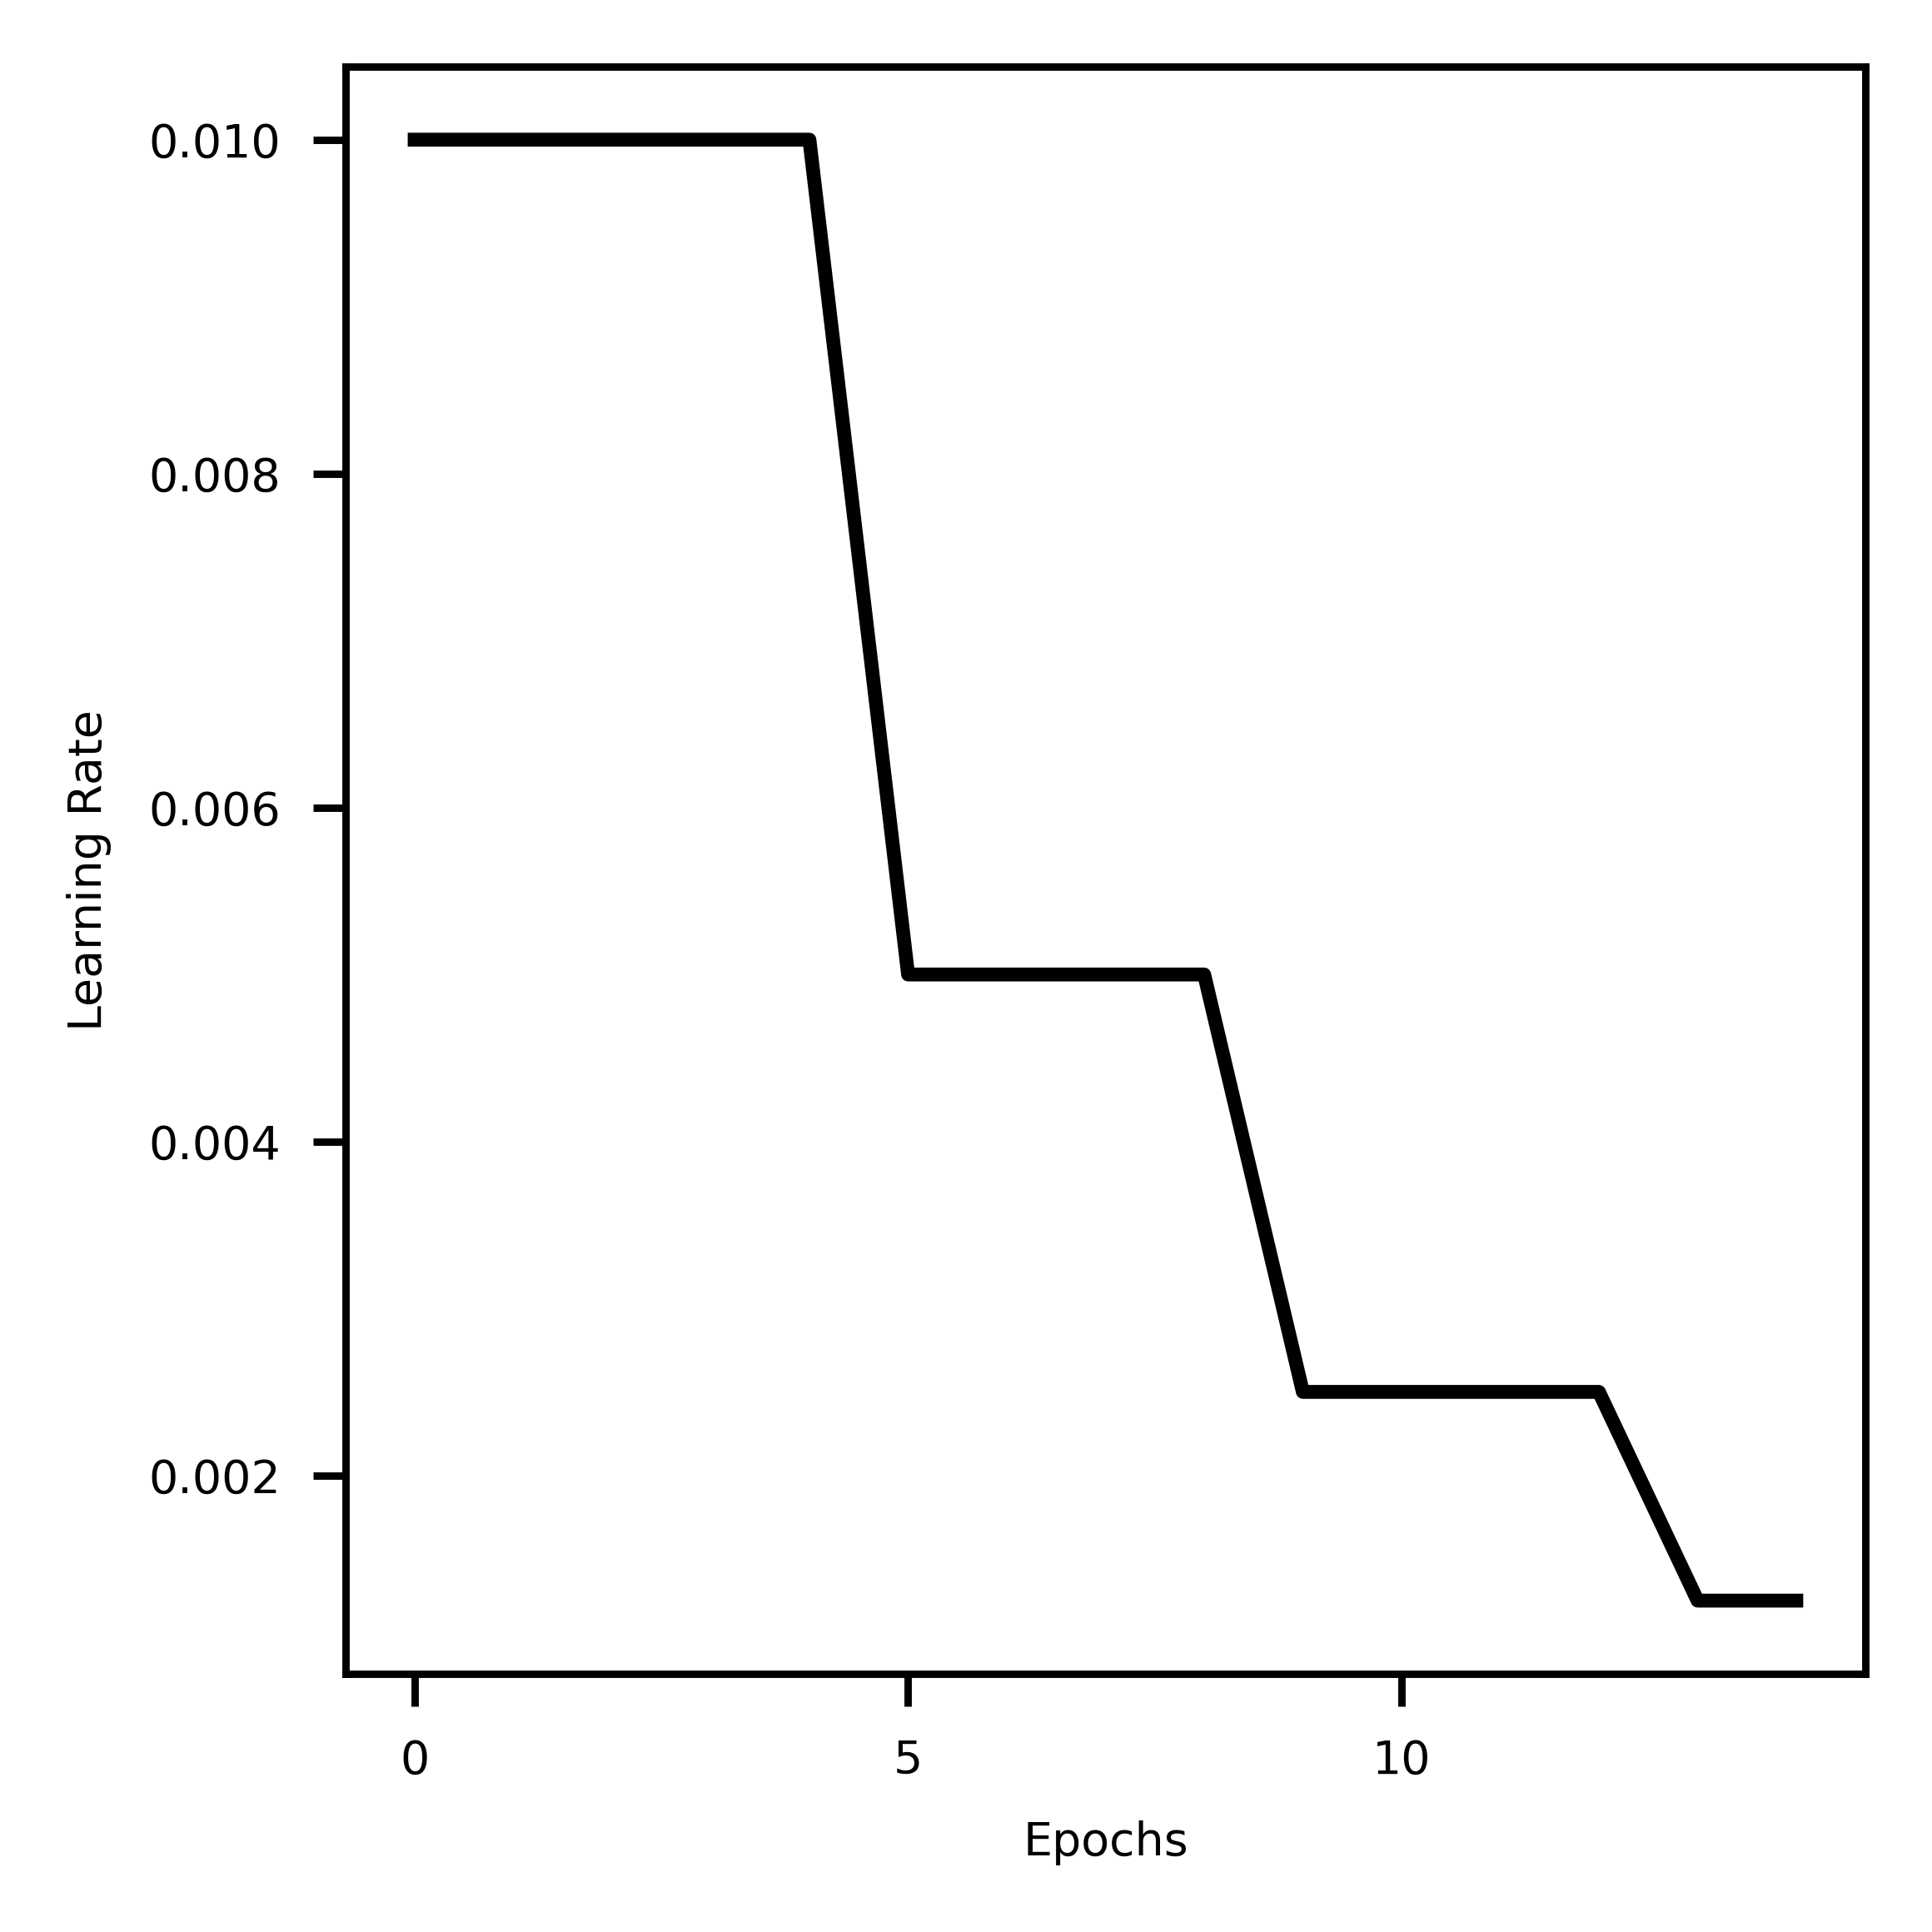

In [21]:
fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=800)
plt.plot(lr[0]["lr"],c="black")
plt.xlabel("Epochs", fontsize=5)
plt.ylabel("Learning Rate", fontsize=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.tight_layout()
# plt.savefig("plot_model/lr_schedule.png", dpi = dpi, bbox_inches='tight')
plt.show()